### Loss function an percepton training

In [1]:
def sigmoide(u):
    g = np.exp(u)/(1 + np.exp(u))
    return g
#Aprendizaje
def Gradiente(MaxIter = 100000, eta = 0.001):
    w = np.array([30,-40,-120])#np.ones(3).reshape(3, 1)
    N = len(y2)
    Error =np.zeros(MaxIter)
    Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

    for i in range(MaxIter):
        tem = np.dot(Xent,w)
        tem2 = sigmoide(tem.T)-np.array(y2)
        Error[i] = np.sum(abs(tem2))/N
        tem = np.dot(Xent.T,tem2.T)
        wsig = w - eta*tem/N
        w = wsig
    return w, Error

In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
fig, ax = plt.subplots(1,1)
ax.scatter(X2[:,0], X2[:,1], c=y2, cmap="Accent");

ImportError: Matplotlib requires numpy>=1.23; you have 1.22.4

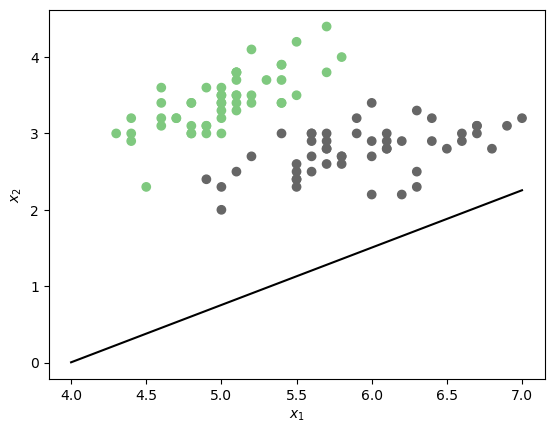

In [11]:

import time
fig, ax = plt.subplots(1,1)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
ax.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
w,_ = Gradiente(MaxIter = 1)
x1 = np.linspace(4,7,20)
x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
line1, = ax.plot(x1,x2,'k')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

for i in range(1,10000,100):
    w,_ = Gradiente(MaxIter = i,eta = 0.01)
    x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
    line1.set_ydata(x2)
    if i > 1000:
        ax.set_ylim([1.8,4.8])
    plt.show()
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(.300)

line1, = ax.plot(x1,x2,'k')



In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"
os.environ["TF_CPP_MAX_VLOG_LEVEL"]= "-1"

In [3]:
import torch
import gzip
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=16384)])
  except RuntimeError as e:
    print(e)

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow.keras import datasets

Reshape to get a lineal vector of the clothes

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


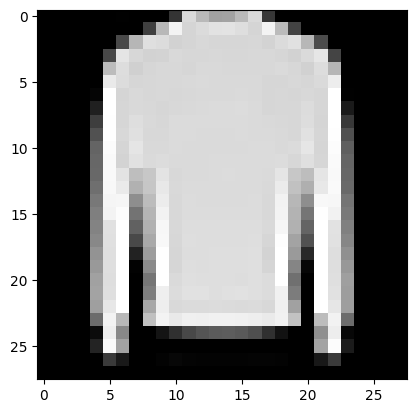

In [9]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[0],:,:], cmap='gray');

In [10]:
from tensorflow.keras import utils 
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [12]:
model = Sequential([
    Dense(32, input_shape = (input_dim, )),
    Activation("tanh"),
    Dense(nb_classes),
    Activation("softmax")

])

In [13]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
from tensorflow import optimizers
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd)

In [15]:
model.train_on_batch(X_trainN, y_trainOHE) #Train with the transform data

2.4910051822662354

In [16]:
preds = model.predict(x_test[0,:].reshape(1, input_dim),verbose=0)

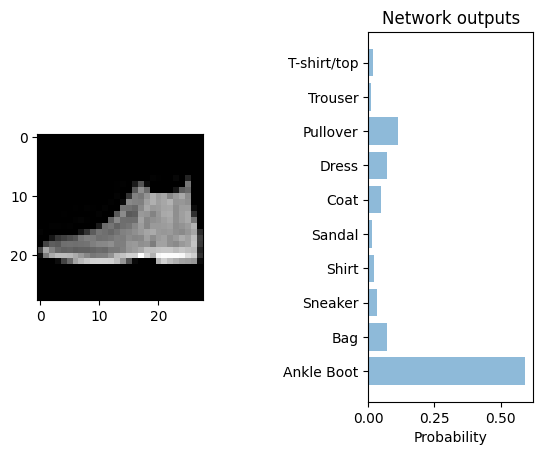

In [17]:
objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122) 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

whit more epochs and a larger batch size

In [18]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 5s - loss: 0.4720 - val_loss: 0.4163 - 5s/epoch - 1ms/step
Epoch 2/10
3375/3375 - 4s - loss: 0.3896 - val_loss: 0.3890 - 4s/epoch - 1ms/step
Epoch 3/10
3375/3375 - 4s - loss: 0.3610 - val_loss: 0.3955 - 4s/epoch - 1ms/step
Epoch 4/10
3375/3375 - 4s - loss: 0.3448 - val_loss: 0.3830 - 4s/epoch - 1ms/step
Epoch 5/10
3375/3375 - 4s - loss: 0.3311 - val_loss: 0.3744 - 4s/epoch - 1ms/step
Epoch 6/10
3375/3375 - 4s - loss: 0.3141 - val_loss: 0.3811 - 4s/epoch - 1ms/step
Epoch 7/10
3375/3375 - 4s - loss: 0.3055 - val_loss: 0.3832 - 4s/epoch - 1ms/step
Epoch 8/10
3375/3375 - 4s - loss: 0.2960 - val_loss: 0.3818 - 4s/epoch - 1ms/step
Epoch 9/10
3375/3375 - 5s - loss: 0.2925 - val_loss: 0.3845 - 5s/epoch - 1ms/step
Epoch 10/10
3375/3375 - 4s - loss: 0.2853 - val_loss: 0.3886 - 4s/epoch - 1ms/step


In [19]:
preds = model.predict(x_test[0,:].reshape(1, input_dim),verbose=0)

In [20]:
preds.flatten()

array([3.9820294e-05, 4.4657581e-06, 3.6875266e-05, 4.5922152e-06,
       1.0847307e-03, 1.1052463e-02, 5.7749581e-05, 1.3554719e-02,
       2.1106994e-01, 7.6309466e-01], dtype=float32)

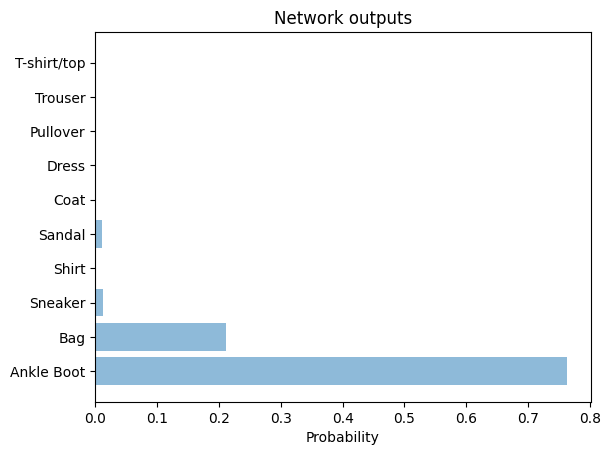

In [21]:
performance = preds.flatten()
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

To get the item we need the max posibility so

In [22]:
preds = np.argmax(model.predict(X_testN), axis=1)
acurr = np.mean(preds == y_test)
print("Acurracy =", acurr * 100, "%")

313/313 [==============================] - 0s 669us/step
Acurracy = 85.22 %


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


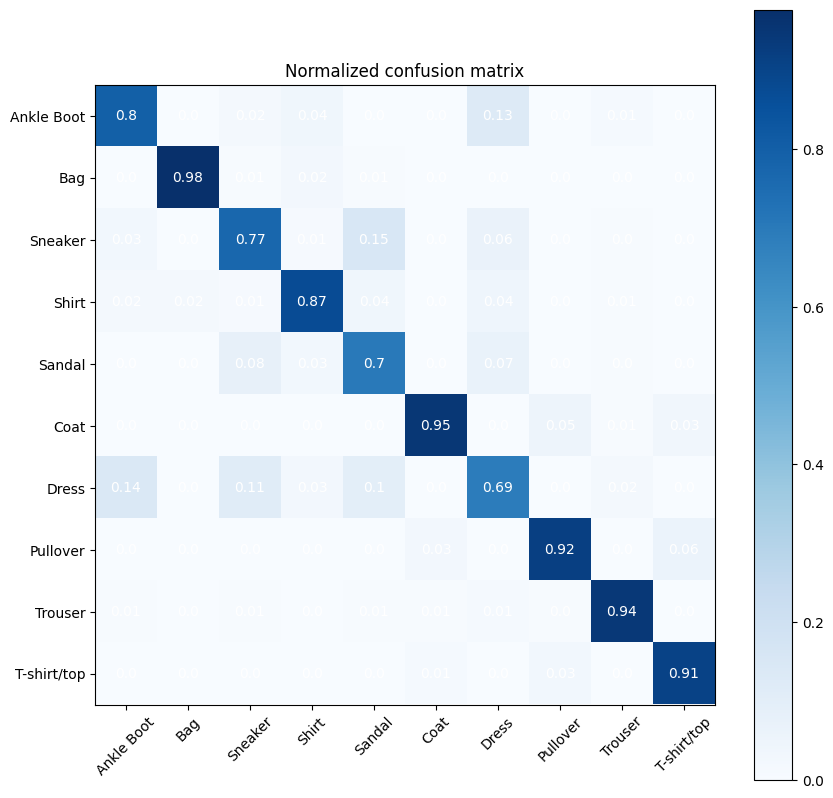

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm = cm / np.sum(cm,axis=0) # to normalize
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);

## Make it functional

In [27]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


inputs = Input(shape=(784,)) # a tensor
type(inputs)

keras.src.engine.keras_tensor.KerasTensor

This way is like conecting the layers line by line then compiling the model

In [28]:
x = Dense(64, activation="tanh")(inputs)
x = Dense(32, activation="tanh")(x)
predictions = Dense(nb_classes, activation="softmax")(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer="sgd", loss="categorical_crossentropy")


In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 6s - loss: 0.5641 - val_loss: 0.4165 - 6s/epoch - 2ms/step
Epoch 2/10
3375/3375 - 5s - loss: 0.3918 - val_loss: 0.3777 - 5s/epoch - 1ms/step
Epoch 3/10
3375/3375 - 5s - loss: 0.3505 - val_loss: 0.3653 - 5s/epoch - 1ms/step
Epoch 4/10
3375/3375 - 5s - loss: 0.3239 - val_loss: 0.3525 - 5s/epoch - 1ms/step
Epoch 5/10
3375/3375 - 5s - loss: 0.3041 - val_loss: 0.3381 - 5s/epoch - 1ms/step
Epoch 6/10
3375/3375 - 4s - loss: 0.2877 - val_loss: 0.3398 - 4s/epoch - 1ms/step
Epoch 7/10
3375/3375 - 4s - loss: 0.2741 - val_loss: 0.3318 - 4s/epoch - 1ms/step
Epoch 8/10
3375/3375 - 4s - loss: 0.2618 - val_loss: 0.3276 - 4s/epoch - 1ms/step
Epoch 9/10
3375/3375 - 5s - loss: 0.2501 - val_loss: 0.3308 - 5s/epoch - 1ms/step
Epoch 10/10
3375/3375 - 4s - loss: 0.2402 - val_loss: 0.3242 - 4s/epoch - 1ms/step


In [31]:
preds = np.argmax(model.predict(X_testN), axis=-1)

313/313 [==============================] - 0s 694us/step


In [32]:
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.33 %



Better results with another layer ailing with the characteristics of the dataset

### As an object

In [33]:
class OOPmodel(tf.keras.Model):
    def __init__(self):
        super(OOPmodel, self).__init__() #Constructor
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh) #look that i can look up the object of activation
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh) #look that i can look up the object of activation
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax) #look that i can look up the object of activation
        self.dropout = tf.keras.layers.Dropout(0.5) #Turn down neurons for a better performance
    
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        if training:
            x = self.dropout(x, training=training)
        return self.dense3(x)
    #The same as the code above, in this case you do all the pipeline as a object and it defines how the information is passed in the layers


model2 = OOPmodel()

In [34]:
model2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics= ["accuracy"])

In [35]:
tf.keras.backend.set_floatx('float32')
model2.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 5s - loss: 0.6962 - accuracy: 0.7726 - val_loss: 0.4339 - val_accuracy: 0.8440 - 5s/epoch - 2ms/step
Epoch 2/10
3375/3375 - 5s - loss: 0.5002 - accuracy: 0.8344 - val_loss: 0.3985 - val_accuracy: 0.8585 - 5s/epoch - 1ms/step
Epoch 3/10
3375/3375 - 4s - loss: 0.4542 - accuracy: 0.8491 - val_loss: 0.3805 - val_accuracy: 0.8612 - 4s/epoch - 1ms/step
Epoch 4/10
3375/3375 - 5s - loss: 0.4223 - accuracy: 0.8595 - val_loss: 0.3672 - val_accuracy: 0.8663 - 5s/epoch - 1ms/step
Epoch 5/10
3375/3375 - 5s - loss: 0.4021 - accuracy: 0.8663 - val_loss: 0.3533 - val_accuracy: 0.8733 - 5s/epoch - 1ms/step
Epoch 6/10
3375/3375 - 5s - loss: 0.3833 - accuracy: 0.8713 - val_loss: 0.3525 - val_accuracy: 0.8713 - 5s/epoch - 1ms/step
Epoch 7/10
3375/3375 - 5s - loss: 0.3693 - accuracy: 0.8770 - val_loss: 0.3522 - val_accuracy: 0.8710 - 5s/epoch - 2ms/step
Epoch 8/10
3375/3375 - 4s - loss: 0.3567 - accuracy: 0.8802 - val_loss: 0.3451 - val_accuracy: 0.8758 - 4s/epoch - 1ms/step
Epoch 9/

In [36]:
preds = np.argmax(model2.predict(X_testN), axis=-1)

313/313 [==============================] - 0s 678us/step


In [37]:
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.02 %


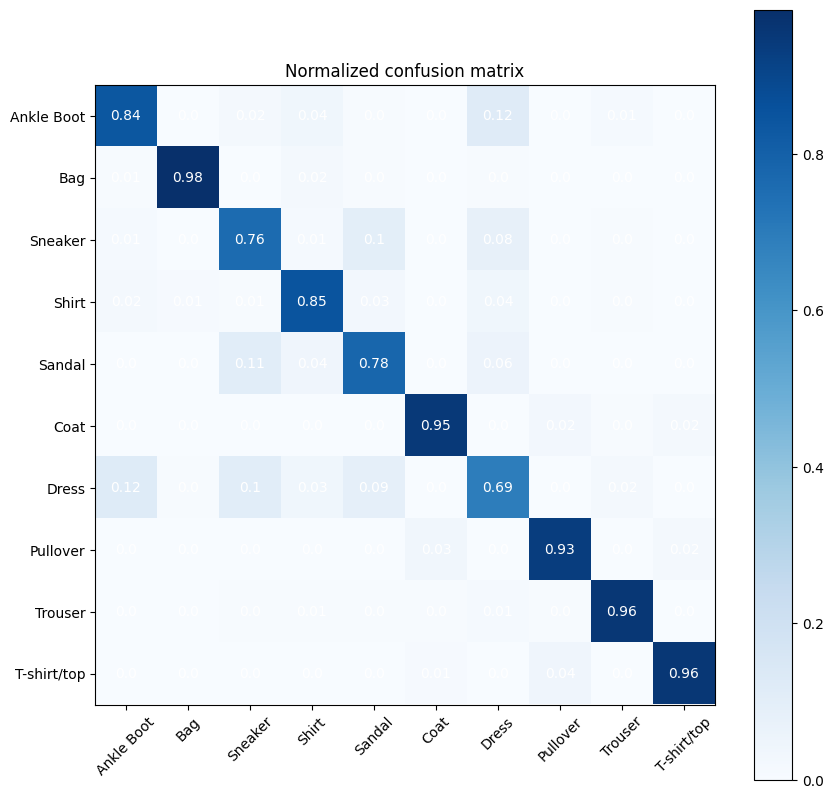

In [38]:
cm = confusion_matrix(y_test, preds)
cm = cm / np.sum(cm,axis=0) # to normalize
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);